# IMAGE CLASSIFICATION - GEORGE MARIOS KOUPANIS 02139

**This project shows the Image Classification of a Weather Image Recognition dataset on Kaggle.**

https://www.kaggle.com/datasets/jehanbhathena/weather-dataset/data

**Context**

    This dataset contains 6862 images of different types of weather, it can be used to implement weather classification based on the photo.

**Content**

    The pictures are divided into 11 classes: dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow.


##Import the modules

The path to the dataset (tested in main pc) => usr/local/dataset/[sub-class]

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

##Unzip the dataset

Dataset is located to (/content/drive/MyDrive/Colab_Notebooks/archive.zip) and is being unzipped (-d checks if exists)

In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/archive.zip" -d "/usr/local"

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: /usr/local/dataset/frost/3913.jpg  
  inflating: /usr/local/dataset/frost/3914.jpg  
  inflating: /usr/local/dataset/frost/3915.jpg  
  inflating: /usr/local/dataset/frost/3916.jpg  
  inflating: /usr/local/dataset/frost/3917.jpg  
  inflating: /usr/local/dataset/frost/3918.jpg  
  inflating: /usr/local/dataset/frost/3919.jpg  
  inflating: /usr/local/dataset/frost/3920.jpg  
  inflating: /usr/local/dataset/frost/3921.jpg  
  inflating: /usr/local/dataset/frost/3922.jpg  
  inflating: /usr/local/dataset/frost/3923.jpg  
  inflating: /usr/local/dataset/frost/3924.jpg  
  inflating: /usr/local/dataset/frost/3925.jpg  
  inflating: /usr/local/dataset/frost/3926.jpg  
  inflating: /usr/local/dataset/frost/3927.jpg  
  inflating: /usr/local/dataset/frost/3928.jpg  
  inflating: /usr/local/dataset/frost/3929.jpg  
  inflating: /usr/local/dataset/frost/3930.jpg  
  inflating: /usr/local/dataset/frost/3931.jpg  
  inflating: /

##Data Preparation

In this section, data augmentation is being used to train data. Data also gets split into train and validation


In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    #rotation_range=30,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #brightness_range = (0.5, 1.5),
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/usr/local/dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    '/usr/local/dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


##Pre-trained model

In this section a pretrained model is being used to increase the metrics of the program. With Transfer Learning new layers on top for the task (11 weather classes) are being added and they are the only ones that are being trained

In [16]:
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False, # include only load the layers that are used for feature extraction (use pre trained layers and train the last)
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x) # was 0.3
x = Dense(128, activation='relu')(x) # combines and interprets features
x = Dropout(0.3)(x) # was 0.3
predictions = Dense(11, activation='softmax')(x)  # 11 classes

model = Model(inputs=base_model.input, outputs=predictions)

##Compile the model

The modeling is being compiled with Adam, Lr = 0.001. Also there is Early Stopping that can prevent overfitting

In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.001), # was 0.0001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


##Train the model

In this section the model is being trained and also there's the following plots:
1. Accuracy Over Epochs
2. Loss over Epochs

Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.5155 - loss: 1.4791

172/172 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.5162 - loss: 1.4768 - val_accuracy: 0.7918 - val_loss: 0.5880
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.7537 - loss: 0.6846

172/172 ━━━━━━━━━━━━━━━━━━━━ 150s 870ms/step - accuracy: 0.7538 - loss: 0.6846 - val_accuracy: 0.8152 - val_loss: 0.5230
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.7996 - loss: 0.5753

172/172 ━━━━━━━━━━━━━━━━━━━━ 130s 756ms/step - accuracy: 0.7996 - loss: 0.5753 - val_accuracy: 0.8210 - val_loss: 0.5025
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8064 - loss: 0.5300

172/172 ━━━━━━━━━━━━━━━━━━━━ 149s 869ms/step - accuracy: 0.8064 - loss: 0.5300 - val_accuracy: 0.8262 - val_loss: 0.4819
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 129s 751ms/step - accuracy: 0.8231 - loss: 0.4868 - val_accuracy: 0.8262 - val_loss: 0.4873
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.8380 - loss: 0.4701

172/172 ━━━━━━━━━━━━━━━━━━━━ 129s 747ms/step - accuracy: 0.8380 - loss: 0.4701 - val_accuracy: 0.8269 - val_loss: 0.4718
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.8554 - loss: 0.4015

172/172 ━━━━━━━━━━━━━━━━━━━━ 132s 762ms/step - accuracy: 0.8553 - loss: 0.4017 - val_accuracy: 0.8371 - val_loss: 0.4617
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8559 - loss: 0.4081

172/172 ━━━━━━━━━━━━━━━━━━━━ 142s 766ms/step - accuracy: 0.8559 - loss: 0.4083 - val_accuracy: 0.8276 - val_loss: 0.4561
Epoch 9/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 739ms/step - accuracy: 0.8525 - loss: 0.3924 - val_accuracy: 0.8342 - val_loss: 0.4965
Epoch 10/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8602 - loss: 0.3883

172/172 ━━━━━━━━━━━━━━━━━━━━ 130s 757ms/step - accuracy: 0.8601 - loss: 0.3883 - val_accuracy: 0.8422 - val_loss: 0.4458
Epoch 11/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 131s 762ms/step - accuracy: 0.8614 - loss: 0.3933 - val_accuracy: 0.8415 - val_loss: 0.4790
Epoch 12/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 153s 888ms/step - accuracy: 0.8615 - loss: 0.3931 - val_accuracy: 0.8364 - val_loss: 0.4843
Epoch 13/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 132s 768ms/step - accuracy: 0.8624 - loss: 0.3804 - val_accuracy: 0.8459 - val_loss: 0.4819
Epoch 14/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 128s 744ms/step - accuracy: 0.8793 - loss: 0.3507 - val_accuracy: 0.8378 - val_loss: 0.4772
Epoch 15/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 147s 851ms/step - accuracy: 0.8784 - loss: 0.3347 - val_accuracy: 0.8218 - val_loss: 0.5162


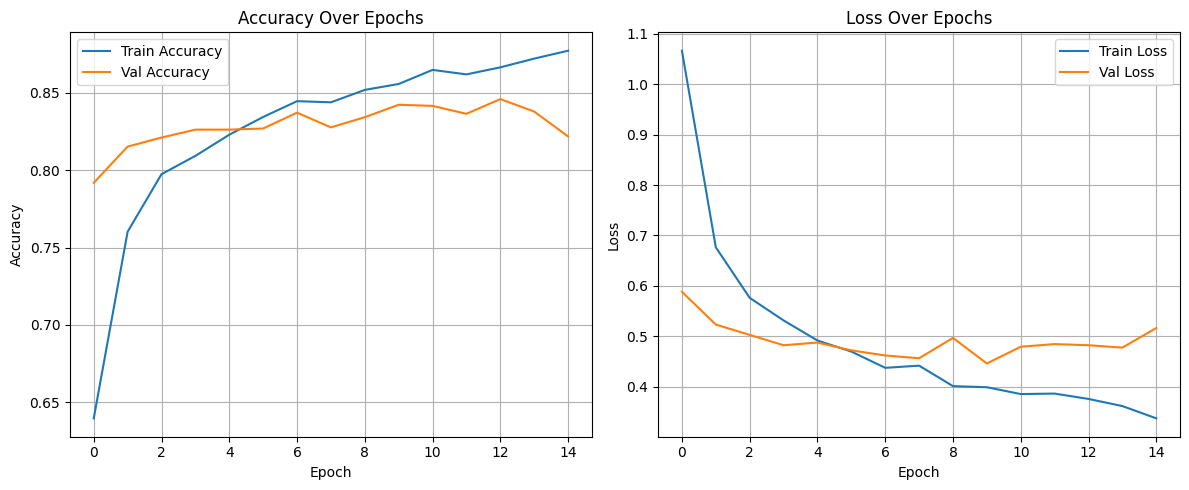

In [18]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Other results

    1) More overfitting that was cut with dropout(0,3 -> 0,5) --MobileNetV2--

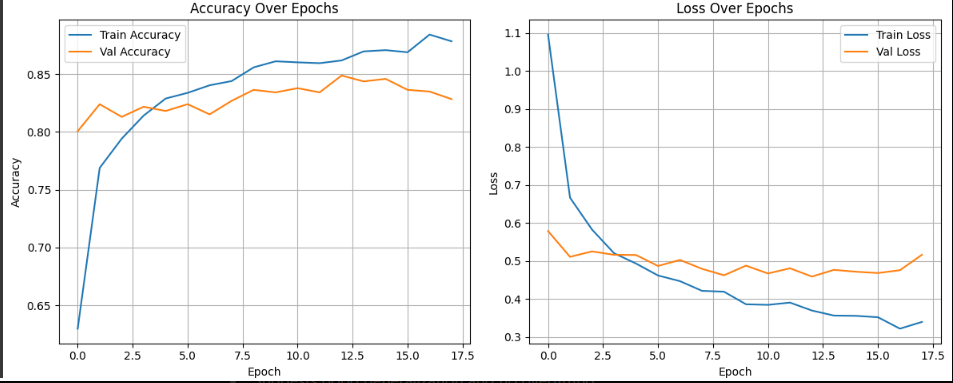

    2) Tested with dropout 0,5 and AdamW as optimizer --MobileNetV2--

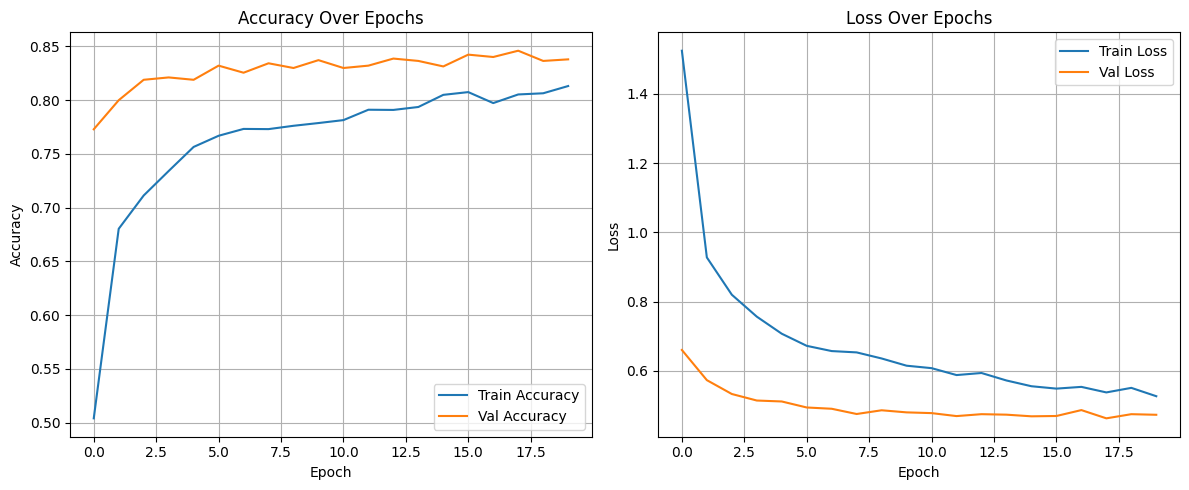

    3) Test with ResNet152V2 (best accuracy)

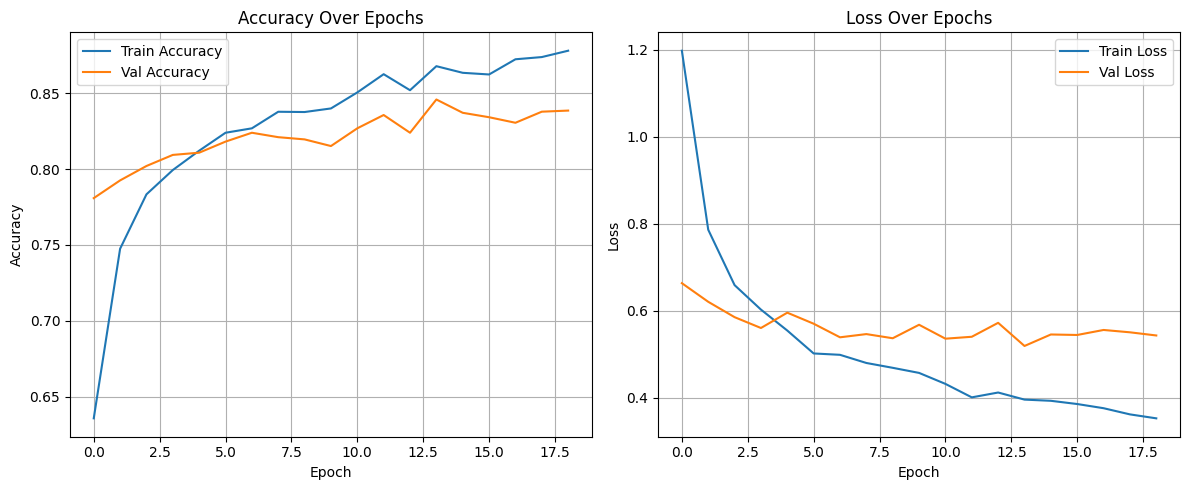

    4) A lot more data augmentation

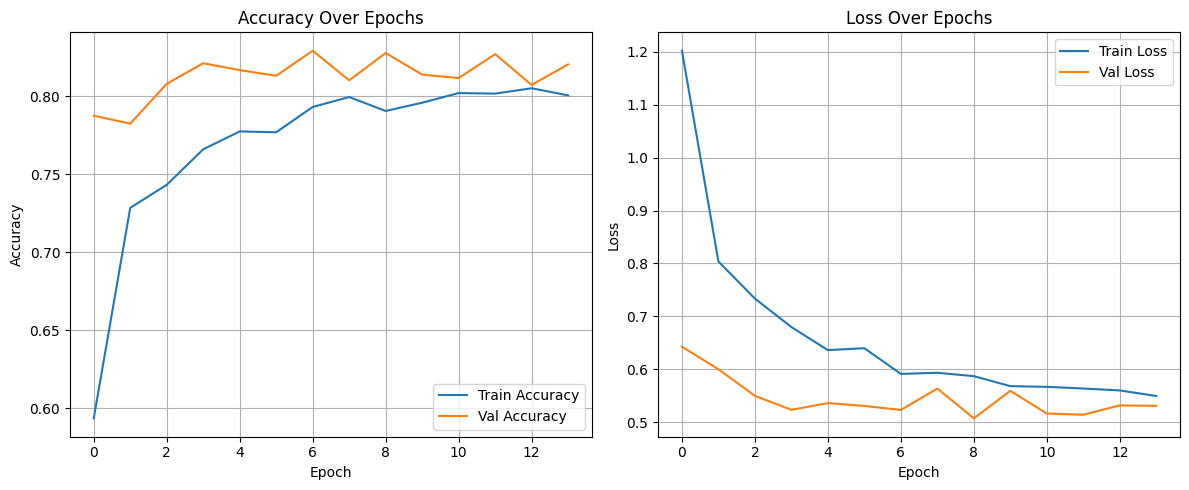

## Test the model

The model is being tested so that we can evaluate if the prediction was right or not. (Replace the img_path each time for test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


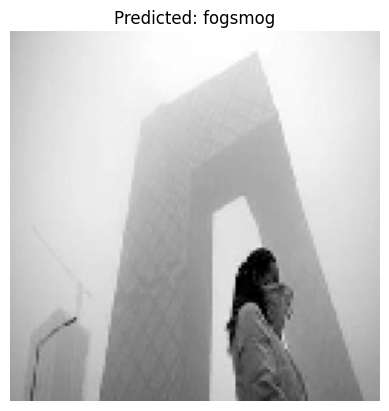

In [7]:
img_path = '/usr/local/dataset/fogsmog/4075.jpg'

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
preds = model.predict(img_array)
predicted_index = np.argmax(preds)
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_label = index_to_class[predicted_index]

# Display prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

## Commentary

The results of this model show that there has been a good train, validation and test on the specific dataset. So, that been said , the model can most likely (based on accuracy) evalute and classify the images and clarify in which of the 11 classes they belong to.

- There is some overfitting in the dataset but I tried fixing that.

TESTED WITH: img_path = '/usr/local/dataset/frost/3600.jpg' ===> Prediction: frost (CORRECT)
TESTED WITH: img_path = '/usr/local/dataset/fogsmog/4075.jpg' ===> Prediction: fogsmog (CORRECT)


## References

    1. https://www.youtube.com/watch?v=oHGVDtgGbGo

    2. https://chatgpt.com

    3. https://www.youtube.com/watch?v=FXKMmilL70w

    4. https://community.deeplearning.ai/t/include-top-parameter-and-usage-of-custom-model-for-transfer-learning/260359/5

    5. https://www.geeksforgeeks.org/top-pre-trained-models-for-image-classification/

    6. https://www.youtube.com/watch?v=F8uFAkHfK18

# Convert to .html

In [19]:
!jupyter nbconvert --to html Image Classification.ipynb

[NbConvertApp] WARNING | pattern 'Image' matched no files
[NbConvertApp] WARNING | pattern 'Classification.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
  